- 머신러닝 학습과정

<img src='https://thebook.io/img/080263/020.jpg'>

출처 : https://thebook.io/img/080263/020.jpg

- 딥러닝 학습과정


<img src='https://thebook.io/img/080263/025_2.jpg'>

출처 : https://thebook.io/img/080263/025_2.jpg

## 범죄율로 집값 예측하기(회귀 문제)

- CRIM : 마을의 1인당 범죄율
- ZN : 25,000 평방피트를 넘는 부지에 대한 주거용 토지의 비율
- INDUS : 도시당 비소매 비지니스 acres(에이커, 넓이의 단위)비율
- CHAS : 찰스강에 대한 더미 변수(강의 경계에 위차한 경우는 1, 아니면 0)
- NOX : 일산화질소 농도
- RM : 거주할 수 있는 방 개수
- AGE : 1940년 이전에 건축된 소유 주택의 비율
- DIS : 5개 주요 고용센터까지의 가중거리
- RAD : 고속도로 접근 용이도
- TAX : 10,000 달러당 재산세율
- PTRATIO : 지역의 교사와 학생 수 비율
- B : 지역의 흑인 거주 비율
- LSTAT : 하위 계층의 비율
-  MEDV : 본인 소유의 주택가격(중앙값)

In [ ]:
!pip install tensorflow-gpu
!pip install keras

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.layers import Input,Dense
from keras.models import Model
from keras import metrics

%config InlineBackend.figure_format = 'retina' #그래프 그릴때 높은 해상도로 그리도록 설정.

- boston_housing 데이터셋도 가지고 있음(keras)

In [3]:
from keras.datasets import boston_housing
(x_train,y_train),(x_test,y_test) = boston_housing.load_data()
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

65536/57026 [==================================] - 0s 0us/step


- DataFrame 생성

In [4]:
train_df = pd.DataFrame(data=x_train,columns = cols)
test_df = pd.DataFrame(data=x_test,columns = cols)

In [5]:
train_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [6]:
train_df.shape,test_df.shape

((404, 13), (102, 13))

- 부분 데이터 추출 방법

In [ ]:
x_train_crim = x_train[:,0]
x_test_crim = x_test[:,0]

print(x_train_crim,x_test_crim)

In [ ]:
x_train_crim = train_df["CRIM"].values
x_test_crim = test_df["CRIM"].values

print(x_train_crim,x_test_crim)

- seaborn을 활용한 집값과 범죄율 회귀 그래프

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


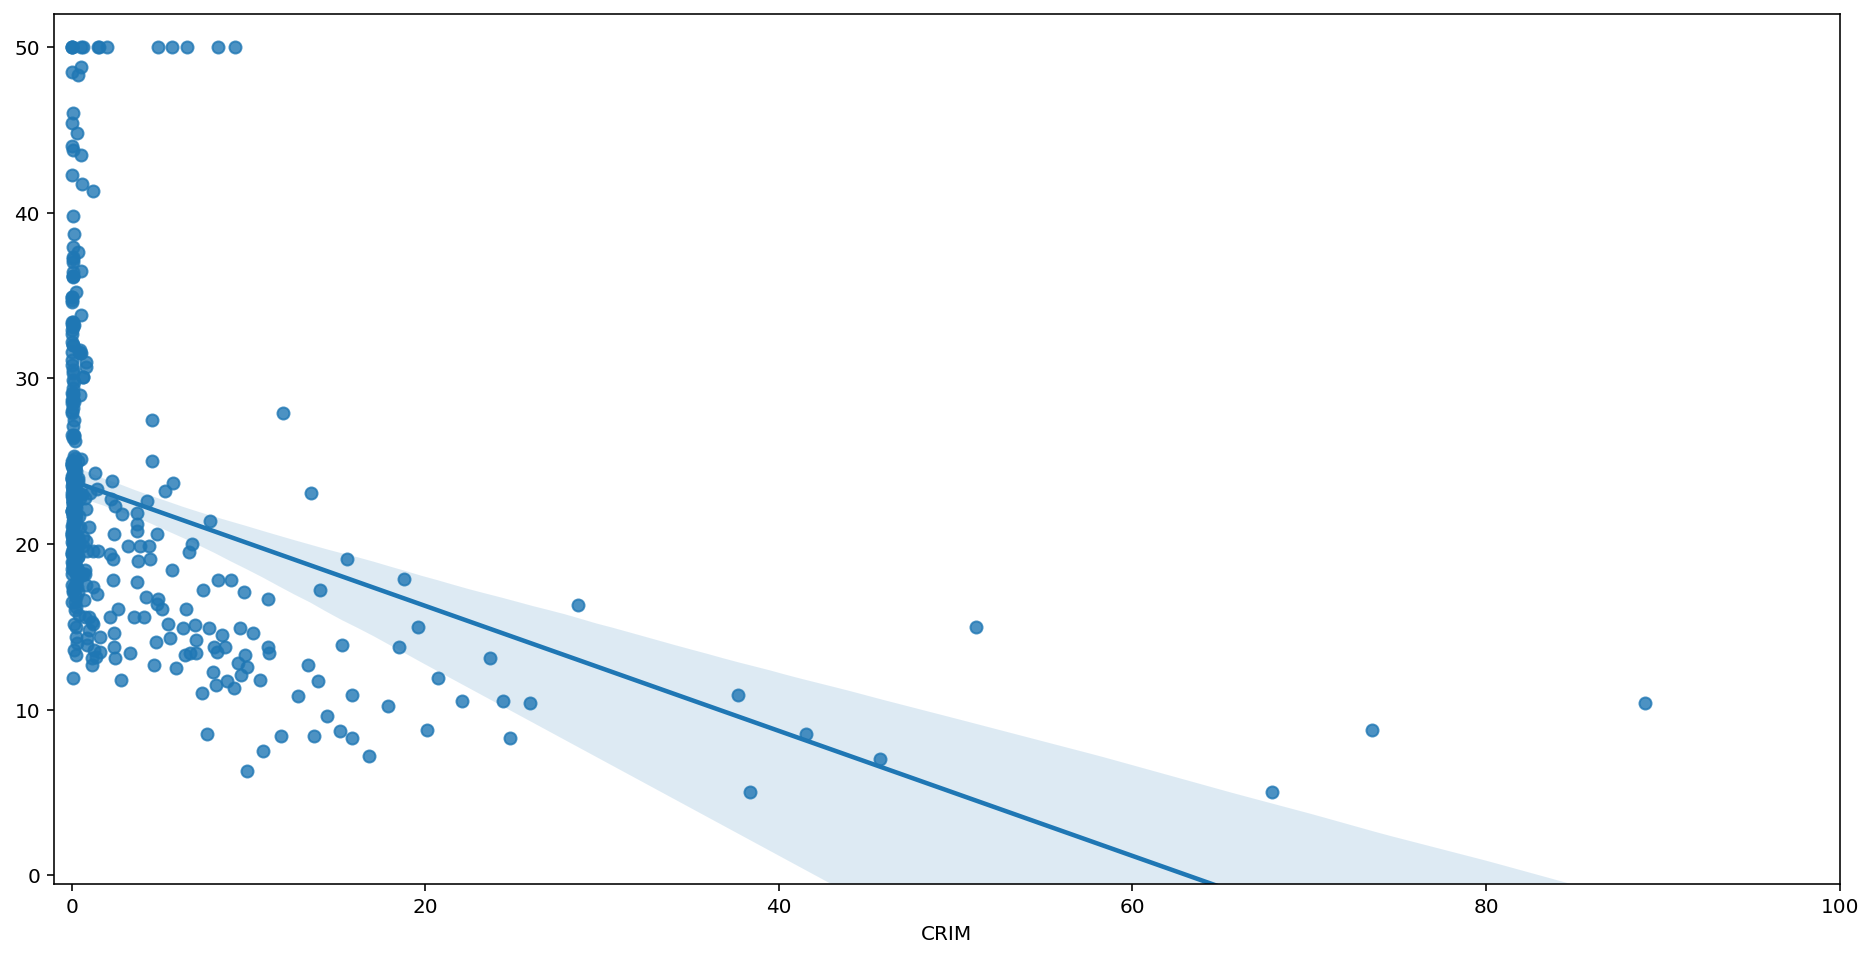

In [9]:
plt.figure(figsize=(16,8))
plt.axis([-1,100,-0.5,52])
sns.regplot(train_df['CRIM'],y_train)
plt.show()

- CRIM -> 집값에 영향을 주나?

In [10]:
inputs = Input(shape=(1,))

fc1 = Dense(10, activation='relu')(inputs)
fc2 = Dense(30,activation='relu')(fc1)
outputs = Dense(1)(fc2)

model = Model(inputs = inputs, outputs = outputs)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 381
Trainable params: 381
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer = 'RMSprop',loss = 'mean_squared_error')

In [ ]:
history = model.fit(x_train_crim,y_train, epochs=30, batch_size=8)

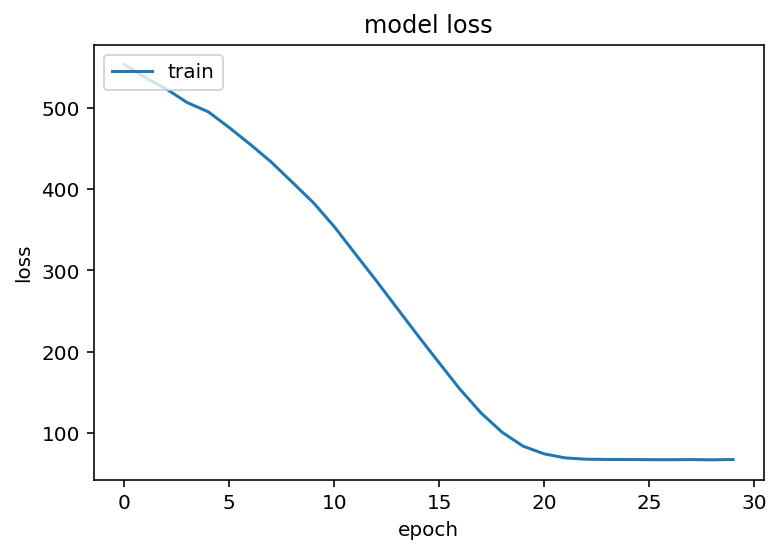

In [14]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [15]:
def create_model(input_shape):
    inputs = Input(shape=(input_shape,))
    fc1 = Dense(10,activation = 'relu')(inputs)
    fc2 = Dense(30,activation = 'relu')(fc1)
    outputs = Dense(1)(fc2)
    model = Model(inputs = inputs, outputs = outputs)
    return model

 - y_pred = dot(w,x)+b / y_pred = $w*x+b$

In [ ]:
model = create_model(1)
model.summary()
model.compile(optimizer = 'RMSprop',
              loss='mean_squared_error')

In [ ]:
history = model.fit(x_train_crim, y_train, 
                    validation_data=(x_test_crim, y_test),
                    epochs=30, batch_size=8)

### 딥러닝의 학습의 과정

1. 학습 데이터에서 배치(batch, sample) 크기 만큼 데이터를 가져온다.
2. 배치 데이터를 네트워크(=모델 설계, layer)에 입력하여 계산.
3. 예측값(y_pred)을 정답(y)과 비교. / $error = {\dfrac{1}{2}}\sum_{i=1}^{N} (y- {\hat{y})^2}$ , y = true value,

${\hat {y}}$ = $w_0+w_1x_1+w_2x_2+{\cdots}+w_Nx_N$ /predict value 
4. 손실 함수로 3번(layer=3)의 오차를 계산하고, 오차를 줄이는 방향(gradient descent)으로 네트워크의 가중치들을 업데이트한다.(=그래디언트의 반대 방향으로 조정)

<img src = 'https://t1.daumcdn.net/cfile/tistory/9998293D5C4E3F0C28'>

<img src='https://images.velog.io/images/sset2323/post/e7b4fe6c-1395-4ea8-88e0-3e7e598e5519/image.png'>

In [21]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### 상대적으로 높은 성능으로 집값 예측하기

In [ ]:
#Seaborn을 활용한 집값과 범죄율의 회귀 그래프.
test_df = pd.DataFrame(data = x_test, columns = cols)

plt.figure(figsize=(16,8))
plt.axis([-1,100,-0.5,52])
sns.regplot(train_df['CRIM'],y_train,color = '#ff9900',marker='o')
sns.regplot(test_df['CRIM'],y_test,color = '#146EB4',marker = 'x')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
#Seaborn을 활용한 집값과 범죄율의 회귀 그래프.
plt.figure(figsize=(16,8))
sns.regplot(train_df['RM'],y_train,color = '#ff9900',marker='o')
sns.regplot(test_df['RM'],y_test,color = '#146EB4',marker = 'x')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [30]:
#한정된 속성을 갖는 학습 데이터 만들기. / CRIM : 범죄율
#RM: room / age : 나이 / PTRATIO : 도시별 학생-교사 비율
x_train_four = train_df[['CRIM','RM',"AGE",'PTRATIO']].values
x_test_four = test_df[['CRIM','RM',"AGE",'PTRATIO']].values

In [31]:
def create_model(input_shape):
    inputs = Input(shape=(input_shape,))
    fc1 = Dense(10,activation = 'relu')(inputs)
    fc2 = Dense(30,activation = 'relu')(fc1)
    outputs = Dense(1)(fc2)
    model = Model(inputs = inputs, outputs = outputs)
    return model

In [38]:
model = create_model(4)
model.summary()
model.compile(optimizer='RMSprop',loss = 'mean_squared_error')

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_12 (Dense)            (None, 10)                50        
                                                                 
 dense_13 (Dense)            (None, 30)                330       
                                                                 
 dense_14 (Dense)            (None, 1)                 31        
                                                                 
Total params: 411
Trainable params: 411
Non-trainable params: 0
_________________________________________________________________


In [ ]:
!nvidia-smi

In [ ]:
! df -h

In [ ]:
! cat /proc/cpuinfo

In [ ]:
history = model.fit(x_train_four, y_train, 
                    validation_data=(x_test_four, y_test),
                    epochs=30, batch_size=8)

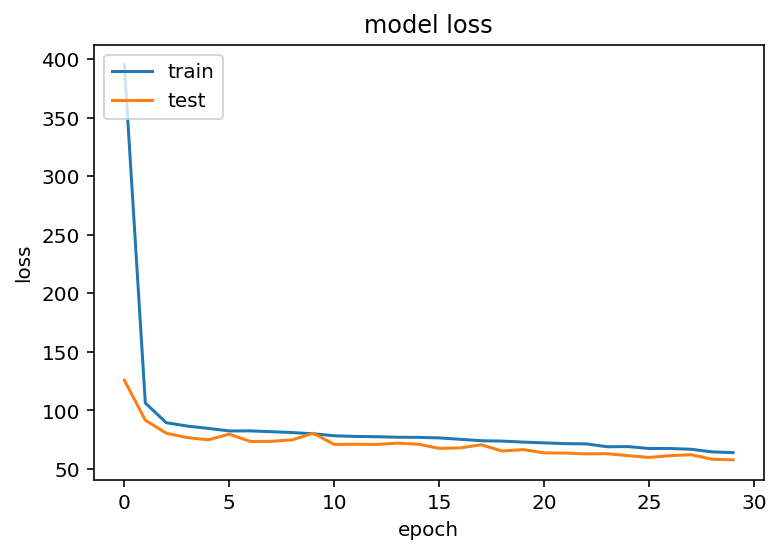

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### 한국의 집값에 대한 분석 및 예측을 위해 데이터를 수집하자.

dataset : https://github.com/bjpublic/TMI-Deeplearning/tree/master/Data

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers,metrics
from tensorflow.keras.optimizers import Adam


#euc-kr : Extend unix code / 영어를 제외한 문자를 표현하기 위한 확장부호를 의미
df_ks_cn = pd.read_csv('/content/drive/MyDrive/house/경상남도_창녕군_개별주택가격정보_20190806.csv',encoding='euc-kr')
df_dj_dg = pd.read_csv('/content/drive/MyDrive/house/대전광역시_동구_개별주택가격정보_20190719.csv',encoding ='euc-kr')
df_jr_wj = pd.read_csv('/content/drive/MyDrive/house/전라북도_완주군_개별주택가격정보_20191010.csv',encoding='euc-kr')
df_jr_jj = pd.read_csv('/content/drive/MyDrive/house/전라북도_전주시_개별주택가격정보_20190508.csv',encoding='euc-kr')
df_cc_cj = pd.read_csv('/content/drive/MyDrive/house/충청북도_충주시_개별주택가격정보_20190501.csv',encoding='euc-kr')


In [2]:
df_tmp = []
df_tmp_y = []
for idx, df in enumerate([df_ks_cn, df_dj_dg, df_jr_wj, df_jr_jj, df_cc_cj]):
  df_tmp.append(df.loc[:,['법정동코드', '법정동명', '지번', '특수지구분명', '토지대장면적', '산정대지면적', '건물전체연면적', '건물산정연면적', '표준지여부', '주택가격']])
df_train = pd.concat([df_tmp[0], df_tmp[1], df_tmp[2], df_tmp[3], df_tmp[4]])
df_train.head()

,법정동코드,법정동명,지번,특수지구분명,토지대장면적,산정대지면적,건물전체연면적,건물산정연면적,표준지여부,주택가격
0,4874025021,경상남도 창녕군 창녕읍 송현리,45-8,일반,610.0,610.0,93.15,93.15,N,97000000
1,4874025021,경상남도 창녕군 창녕읍 송현리,62-2,일반,270.0,270.0,51.57,51.57,N,51000000
2,4874025021,경상남도 창녕군 창녕읍 송현리,62-3,일반,476.0,376.0,81.58,81.58,N,88200000
3,4874025021,경상남도 창녕군 창녕읍 송현리,64-3,일반,415.0,415.0,135.85,135.85,N,110000000
4,4874025021,경상남도 창녕군 창녕읍 송현리,66-1,일반,533.0,47.0,28.76,28.76,N,6020000


한글 폰트 참고 : https://teddylee777.github.io/colab/colab-korean

In [3]:
#전처리 : plot->한글은 그려지지가 않음. 영어로 바꿈.
df_train.columns = ['legal_code','legal_name','dist_num', 'is_special','land_area','counting_area', 'total_area', 'building_area', 'is_standard', 'price']
df_train.head()

,legal_code,legal_name,dist_num,is_special,land_area,counting_area,total_area,building_area,is_standard,price
0,4874025021,경상남도 창녕군 창녕읍 송현리,45-8,일반,610.0,610.0,93.15,93.15,N,97000000
1,4874025021,경상남도 창녕군 창녕읍 송현리,62-2,일반,270.0,270.0,51.57,51.57,N,51000000
2,4874025021,경상남도 창녕군 창녕읍 송현리,62-3,일반,476.0,376.0,81.58,81.58,N,88200000
3,4874025021,경상남도 창녕군 창녕읍 송현리,64-3,일반,415.0,415.0,135.85,135.85,N,110000000
4,4874025021,경상남도 창녕군 창녕읍 송현리,66-1,일반,533.0,47.0,28.76,28.76,N,6020000


In [4]:
#price=0인것을 count해보자
df_train[df_train['price']==0].value_counts() #row를 다 출력

legal_code  legal_name        dist_num   is_special  land_area  counting_area  total_area  building_area  is_standard  price
4571036028  전라북도 완주군 고산면 성재리  0790-0000  일반          1730.0     1730.0         169.60      0.0            N            0        2
4511311100  전라북도 전주시 덕진구 산정동  7580002    일반          7011.0     0.0            494.90      0.0            N            0        2
4571036028  전라북도 완주군 고산면 성재리  0790-0000  일반          1730.0     1730.0         146.40      0.0            N            0        2
4571033028  전라북도 완주군 이서면 은교리  0478-0003  일반          2430.0     2430.0         294.20      0.0            N            0        2
4511111100  전라북도 전주시 완산구 전동   3020010    일반          310.7      0.0            129.36      0.0            N            0        2
                                                                                                                               ..
4571025328  전라북도 완주군 봉동읍 장기리  0393-0002  일반          1687.0     1687.0         935.20      0.0 

In [5]:
df_train[df_train['price'] == 0]['price'].value_counts()  #price만 출력.

0    1258
Name: price, dtype: int64

In [6]:
df_train = df_train.loc[(df_train['price']!=0)]
print(df_train.shape)

(134799, 10)


In [7]:
#앞 번호와 뒤 번호가 다른 분포 특성을 가질 것이다.
df_train['dist_num_0']= df_train['dist_num'].str.split('-').str.get(0)
df_train['dist_num_1']= df_train['dist_num'].str.split('-').str.get(1)
df_train = df_train.drop(['dist_num'], axis=1)
df_train.head()

,legal_code,legal_name,is_special,land_area,counting_area,total_area,building_area,is_standard,price,dist_num_0,dist_num_1
0,4874025021,경상남도 창녕군 창녕읍 송현리,일반,610.0,610.0,93.15,93.15,N,97000000,45,8
1,4874025021,경상남도 창녕군 창녕읍 송현리,일반,270.0,270.0,51.57,51.57,N,51000000,62,2
2,4874025021,경상남도 창녕군 창녕읍 송현리,일반,476.0,376.0,81.58,81.58,N,88200000,62,3
3,4874025021,경상남도 창녕군 창녕읍 송현리,일반,415.0,415.0,135.85,135.85,N,110000000,64,3
4,4874025021,경상남도 창녕군 창녕읍 송현리,일반,533.0,47.0,28.76,28.76,N,6020000,66,1


In [8]:
#부분 지번의 값이 0인 데이터 찾기.
df_train[df_train['dist_num_0'] == '0']
df_train[df_train['dist_num_1'] == '0']

,legal_code,legal_name,is_special,land_area,counting_area,total_area,building_area,is_standard,price,dist_num_0,dist_num_1


In [10]:
df_train['dist_num_0'].isna().value_counts()

False    89490
True     45309
Name: dist_num_0, dtype: int64

In [12]:
df_train['dist_num_0'].isna().sum()
#df_train['dist_num_0].isnull().sum()

45309

In [89]:
df_train['dist_num_1'].isna().value_counts()

False    69777
True     65022
Name: dist_num_1, dtype: int64

In [13]:
df_train['dist_num_0'] = df_train['dist_num_0'].fillna('0')
df_train['dist_num_1'] = df_train['dist_num_1'].fillna('0')

In [14]:
#정수로 변환.
df_train['dist_num_0']= df_train['dist_num_0'].astype(int)
df_train['dist_num_1']= df_train['dist_num_1'].astype(int)

In [15]:
label_encoder_sp = LabelEncoder()
df_train['is_special'] = label_encoder_sp.fit_transform(df_train['is_special'])

In [16]:
#앞 번호와 뒤 번호가 다른 분포 특성을 가질 것이다.
df_train['legal_name_0']= df_train['legal_name'].str.split(' ').str.get(0)
df_train['legal_name_1']= df_train['legal_name'].str.split(' ').str.get(1)
df_train['legal_name_2']= df_train['legal_name'].str.split(' ').str.get(2)
df_train['legal_name_3']= df_train['legal_name'].str.split(' ').str.get(3)
df_train = df_train.drop(['legal_name'], axis=1)
df_train.head()

,legal_code,is_special,land_area,counting_area,total_area,building_area,is_standard,price,dist_num_0,dist_num_1,legal_name_0,legal_name_1,legal_name_2,legal_name_3
0,4874025021,2,610.0,610.0,93.15,93.15,N,97000000,45,8,경상남도,창녕군,창녕읍,송현리
1,4874025021,2,270.0,270.0,51.57,51.57,N,51000000,62,2,경상남도,창녕군,창녕읍,송현리
2,4874025021,2,476.0,376.0,81.58,81.58,N,88200000,62,3,경상남도,창녕군,창녕읍,송현리
3,4874025021,2,415.0,415.0,135.85,135.85,N,110000000,64,3,경상남도,창녕군,창녕읍,송현리
4,4874025021,2,533.0,47.0,28.76,28.76,N,6020000,66,1,경상남도,창녕군,창녕읍,송현리


In [17]:
#생성된 데이터에서 결측값 생성
df_train['legal_name_3'].isna().value_counts()

False    100261
True      34538
Name: legal_name_3, dtype: int64

In [18]:
df_train['legal_name_3']

0        송현리
1        송현리
2        송현리
3        송현리
4        송현리
        ... 
30321    중청리
30322    중청리
30323    중청리
30324    중청리
30325    중청리
Name: legal_name_3, Length: 134799, dtype: object

In [21]:
df_train.shape

(134799, 14)

In [ ]:
df_train = df_train.loc[:,~df_train.columns.duplicated()]

In [19]:
df_train['legal_name_3'] = df_train['legal_name_3'].fillna('')

label_encoder_std = LabelEncoder()
label_encoder_lg0 = LabelEncoder()
label_encoder_lg1 = LabelEncoder()
label_encoder_lg2 = LabelEncoder()
label_encoder_lg3 = LabelEncoder()
vec_std = label_encoder_std.fit_transform(df_train['is_standard'])
vec_lg0 = label_encoder_lg0.fit_transform(df_train['legal_name_0'])
vec_lg1 = label_encoder_lg1.fit_transform(df_train['legal_name_1'])
vec_lg2 = label_encoder_lg2.fit_transform(df_train['legal_name_2'])
vec_lg3 = label_encoder_lg3.fit_transform(df_train['legal_name_3'])

df_train['is_standard'] = vec_std
df_train['legal_name_0'] = vec_lg0
df_train['legal_name_1'] = vec_lg1
df_train['legal_name_2'] = vec_lg2
df_train['legal_name_3'] = vec_lg3
df_train.head()

,legal_code,is_special,land_area,counting_area,total_area,building_area,is_standard,price,dist_num_0,dist_num_1,legal_name_0,legal_name_1,legal_name_2,legal_name_3
0,4874025021,2,610.0,610.0,93.15,93.15,0,97000000,45,8,0,4,100,214
1,4874025021,2,270.0,270.0,51.57,51.57,0,51000000,62,2,0,4,100,214
2,4874025021,2,476.0,376.0,81.58,81.58,0,88200000,62,3,0,4,100,214
3,4874025021,2,415.0,415.0,135.85,135.85,0,110000000,64,3,0,4,100,214
4,4874025021,2,533.0,47.0,28.76,28.76,0,6020000,66,1,0,4,100,214


In [25]:
df_train = df_train.reset_index()

In [26]:
sns.set()
sns.pairplot(df_train, height = 2)
plt.show();

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f7d8d839170> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f7d8d842950> (for post_execute):


KeyboardInterrupt: ignored

- pairplot ->bulid_area, price

In [ ]:
sns.set()
sns.pairplot(df_train[['building_area','price']],height=2)
plt.show()

**(4) log 변환**

왜도(Skewnesss)와 첨도(Kurtosis)가 높은 데이터로는 상관성을 파악하기 어려울 수 있다. 

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdaPvlp%2FbtqF4ULXp3i%2FnvYNHxAXFShYpqU4uGoM41%2Fimg.png'>


왜도(비대칭도)란, 확률변수의 확률분포가 비대칭성을 가지고 있음을 뜻한다. 

영어로는 Skewness라고 하며 a=0이면 정규분포, a<0이면 오른쪽으로 치우침, a>0이면 왼쪽으로 치우침을 의미한다.

첨도란, 확률분포의 뾰족한 정도를 뜻한다. 

영어로는 Kurtosis라고 하며 a=3이면 정규분포, a<3이면 정규분포보다 완만함, a>3이면 정규분포 보다 뾰족함을 의미한다.

 

이러한 특징들을 가진 변수를 정규분포에 가깝게 만들어주기 위해 변수에 Log를 취해준다. 

 

Log를 취해주게 되면 큰 숫자를 같은 비율의 작은 숫자로 만들어주며, 첨도와 왜도가 줄어들면서 정규성이 높아진다.

이는 분석의 정확도를 더 높일 수 있는 결과를 가져온다. 


위의 로그 그래프를 보면 그래프의 증가 폭이 갈수록 줄어들고 있습니다.


즉 x축 변화량에 따른 y축 변화량이 작다는 의미, 이는 큰 수를 같은 비율의 작은 수로 바꿔주는 역할을 합니다.

이러한 특징은 데이터 사이 값의 편차가 큰 특성의 경우에 유용하게 사용됩니다.


편차를 줄여주면 그래프의 왜도(skewness)와 첨도(kurtosis)를 줄일수 있기 때문에 정규성이 높아지는 장점도 있습니다.

정규화의 역할을 한다고 볼 수 있음.


마지막으로 로그끼리의 곱은 덧셈으로, 나눗셈은 뺄셈으로 나타낼 수 있기 때문에 계산을 단순화 시켜주는 이점도 있습니다.
 

로그를 사용한 후에는 원래 값으로 되돌리는 작업이 필요함!  아래와 같이 로그의 역함수인 지수함수를 이용하면 됩니다.

np.log() <-> np.exp()

np.log1p() <-> np.expm1()


이를 테면, 나이와 재산의 관계를 볼 때, 나이는 1~100까지의 범주를 갖지만, 재산은 0원에서 수조원까지 아주 넓게 분포할 수 있다. 게다가 특정 영역에 (이를테면 1억원) 치우쳐 있다면, 그 외의 값들은 왜곡되어 해석될 가능성이 높다. 이런 데이터를 정규분포에 맞게 변형 시켜주는 것이 Log-Transform이다. 


아래 타이타닉 데이터의 예제를 보자. 

In [38]:
import pandas as pd

df_train_ta = pd.read_csv('/content/drive/MyDrive/titanic/train.csv')

In [39]:
numerical_feats = df_train_ta.dtypes[df_train_ta.dtypes != "object"].index 
print("Number of Numerical features: ", len(numerical_feats)) 
categorical_feats = df_train_ta.dtypes[df_train_ta.dtypes == "object"].index 
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  7
Number of Categorical features:  5


In [40]:
for col in numerical_feats: 
  print('{:15}'.format(col), 'Skewness: {:05.2f}'.format(df_train_ta[col].skew()) , 
        ' ' , 
        'Kurtosis: {:06.2f}'.format(df_train_ta[col].kurt()) )

PassengerId     Skewness: 00.00   Kurtosis: -01.20
Survived        Skewness: 00.48   Kurtosis: -01.78
Pclass          Skewness: -0.63   Kurtosis: -01.28
Age             Skewness: 00.39   Kurtosis: 000.18
SibSp           Skewness: 03.70   Kurtosis: 017.88
Parch           Skewness: 02.75   Kurtosis: 009.78
Fare            Skewness: 04.79   Kurtosis: 033.40


위의 결과에서 Skewness와 Kurtosis가 가장 높은 "Fare"을 사용하여 Log를 취해주도록 하겠다. 

 

먼저 시각적으로 왜도, 첨도를 얼마나 가지고 있는지 확인해 보기 위해 plot을 하나 그려준다. 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


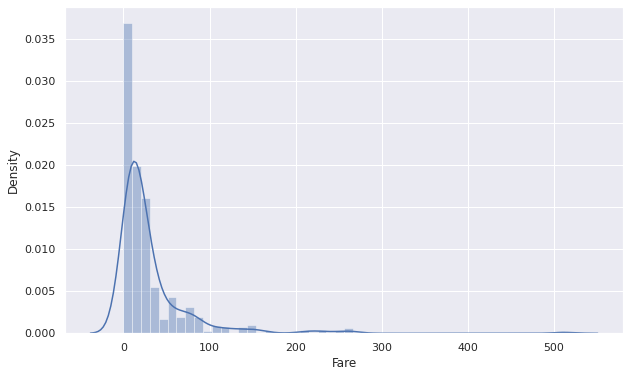

In [41]:
f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(df_train_ta["Fare"])

시각화 결과 눈으로만 봐도 왜도와 첨도가 심한 것이 느껴진다. 

 

이제 Log를 취해준 "Log_Fare"라는 변수를 만들어주고 비교해보도록 하겠다.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.395
Kurtosis: 0.976


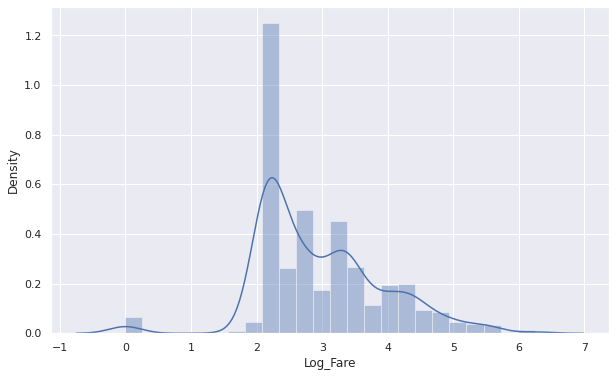

In [42]:
df_train_ta["Log_Fare"] = np.log1p(df_train_ta["Fare"]) 
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(df_train_ta["Log_Fare"]) 
print("Skewness: {:.3f}".format(df_train_ta["Log_Fare"].skew())) 
print("Kurtosis: {:.3f}".format(df_train_ta["Log_Fare"].kurt()))

Log를 취해준 "Log_Fare"라는 변수를 만들고 왜도와 첨도를 확인해보았다. 

 

Skewness와 Kurtosis가 굉장히 많이 떨어졌고, plot 자체도 나름 정규 근사화가 된 것을 확인할 수 있다.


**stats.probplot 이란 ?**

Q-Q(Quantile-Quantile) 플롯은 분석하고자 하는 샘플의 분포과 정규 분포의 분포 형태를 비교하는 시각적 도구이다.

qqplot은 분위수대조도로 불리는 정규모집단 가정을 하는 방법 중 하나이다. 수집 데이터를 표준정규분포의 분위수와 비교하여 그리는 그래프로 데이터의 정규성 가정에 대한 검토를 가능하게 한다.

**분위수 VS 사분위수**

분위수(Quantile)란 데이터의 분포에서 전체 넓이를 일정 비로 나누어 위치에 있는 값으로 사분위(Quartile)와 다른 것이다. 분위수가 사용된 예로 사분위를 들 수 있다. 복습 차원에서 사분위수를 되짚어보자면 통계학에서 Min(최솟값) - Q1(제1 분위수) - Median(중위수) - Q3(제3 분위수) - Max(최댓값)을 의미하는 개념으로 각 0분 위수(최솟값), 1/4 분위수(Q1), 2/4 분위수(Q2=중앙값), 3/4 분위수(Q3), 4/4 분위수(최댓값)를 의미한다.

qqplot에서도 마찬가지로 위와 같은 분위수 개념이 적용된다. qqplot은 표준정규분포의 분위수와 이에 대응하는 분포(측정한 실제 데이터의 분포)의 분위수를 x, y 좌표평면에 plotting하는 개념입니다.

x축의 y축 및 (대략) 예상 분위수에 따라 정렬된 샘플 값을 살펴볼 때, 그림의 일부 섹션에 있는 값이 이론적인 분포에서 가정하는 것보다 더 집중되어 있는지 아니면 덜 집중되어 있는지를 확인할 수 있다. 이 값을 그림으로 나타내면 그림일부 섹션에 있는 값이 전체 선형 추세와 어떻게 다른지 확인할 수 있다.

모집단이 정규성을 따른다면 직선의 형태로 그려지게 된다.

Q-Q 플롯은 동일 분위수에 해당하는 정상 분포의 값과 주어진 분포의 값을 한 쌍으로 만들어 스캐터 플롯(scatter plot)으로 그린 것이다. Q-Q 플롯을 그리는 구체적인 방법은 다음과 같다.

 
1. 대상 샘플을 크기에 따라 정렬(sort)한다.
2. 각 샘플의 분위수(quantile number)를 구한다.
3. 각 샘플의 분위수와 일치하는 분위수를 가지는 정규 분포 값을 구한다.
4.대상 샘플과 정규 분포 값을 하나의 쌍으로 생각하여 2차원 공간에 하나의 점(point)으로 그린다.
5. 모든 샘플에 대해 2부터 4까지의 과정을 반복하여 스캐터 플롯과 유사한 형태의 플롯을 완성한다.
6. 비교를 위한 45도 직선을 그린다

**산점도의 점들이 저 빨간색 선 주위에 모일수록 정규분포를 띄고 있는 것이라고 보시면 됩니다.** 

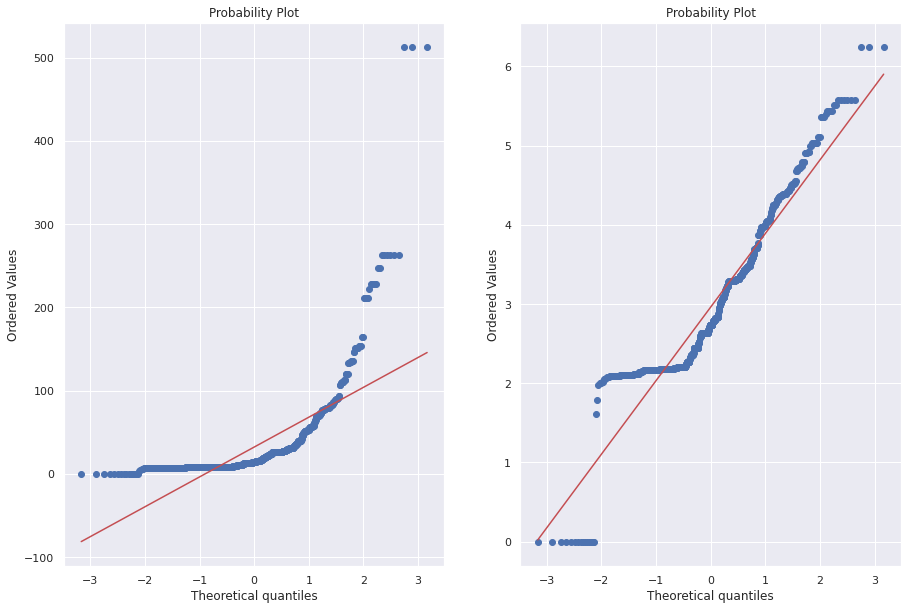

In [43]:
from scipy import stats 

fig = plt.figure(figsize = (15,10)) 
fig.add_subplot(1,2,1) 
res = stats.probplot(df_train_ta['Fare'], plot=plt) 
fig.add_subplot(1,2,2) 
res = stats.probplot(df_train_ta['Log_Fare'], plot=plt)

**(5) box-cox 변환**

Box-Cox Transformation
데이터를 정규분포에 가깝게 만들거나 데이터의 분산을 안정화하는 것

정규성을 가정한 분석법을 적용하기에 앞서 데이터의 전처리에 사용

참고 : https://minji15.tistory.com/3




Box-Cox 변환은 정규 분포와 매우 유사하도록 데이터를 변환합니다.

많은 통계 기법에서 우리는 오류가 정규 분포를 따른다고 가정합니다. 이 가정을 통해 신뢰 구간을 구성하고 가설 검정을 수행 할 수 있습니다. 대상 변수를 변환하여 오류를 정규화 할 수 있습니다 (아직 정상이 아닌 경우).

또한 변수를 변환하면 변환이 백색 잡음을 제거 할 수 있기 때문에 모델의 예측력을 향상시킬 수 있습니다.

알파가 1이고 베타가 3 인 베타 분포가 있다고 가정합니다.이 분포를 플로팅하면 다음과 같이 보일 수 있습니다.

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#log gamma continuous random variable 생성
x = stats.loggamma.rvs(5,size = 500) +5
# Q-Q 플롯 그리기
prob = stats.probplot(x, dist = stats.norm, plot = ax1)
ax1.set_title('Q-Q Original x')

# box-cox 변환 사용 -> 조금 더 정규화됨
x_trans, optimal_lambda = stats.boxcox(x)
prob = stats.probplot(x_trans, dist = stats.norm, plot = ax2)
ax2.set_title('Q-Q box-cox-transflation')
plt.show()

#box-cox 최적의 lambda 값 찾는법
print('최적의 람다값', optimal_lambda)

모델링을 할때, 한쪽으로 쏠린 데이터나, 잔차그래프에서 점점 분산이 커지는 것을 데이터를 만나는 경우가 많은데

이경우 적용할 수 있는 방법 중 하나가 Y를 변환해주는 것이다.
box-cox 변환을 일반적으로 많이 사용하고 있다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FKNJbT%2FbtqExt3JRFV%2F0NeHuNaj17UhJVNhcF7Ld1%2Fimg.png'>

하지만 Box-Cox변환은 y가 0이거나 0보다 작은 경우는 적용할 수 없다는 한계가 있다.

이를 개선하는 방법으로 제안된 것이 **Yeo-Johnson Power Transformations**이다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbzLYUZ%2FbtqExZumVff%2Fn0yFpPDrvoMqFFSm1neL1k%2Fimg.png'>



 

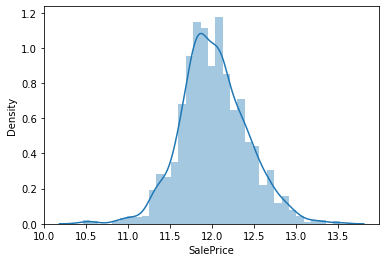

In [ ]:
#histogram
sns.distplot(np.log1p(df_train['SalePrice']));

- Target with Skewnees and Kurtosis

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


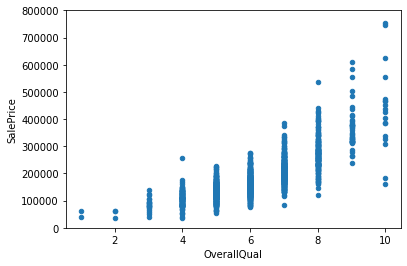

In [ ]:
#scatter plot grlivarea/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [56]:
#단위 변환 및 간단한 이상치 제거
df_train['price'] = df_train['price']/100000000
df_inlier = df_train[df_train['building_area']<6000]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


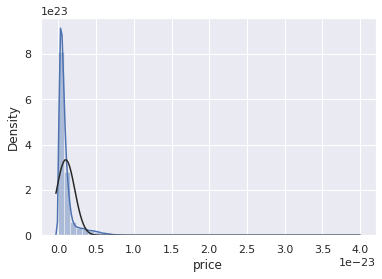

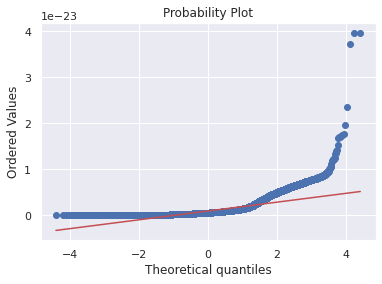

In [57]:
#집값 분포
sns.distplot(df_train['price'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['price'], plot=plt)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


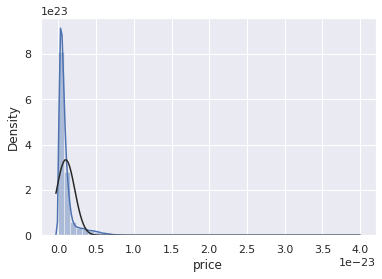

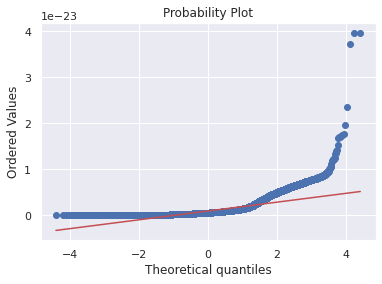

In [58]:
#집값 분포
sns.distplot(np.log1p(df_train['price']), fit=norm);
fig = plt.figure()
res = stats.probplot(np.log1p(df_train['price']), plot=plt)

- 변환을 해도 차이가 없다.

In [75]:
df_train['price'] = np.log1p(df_train['price'])

X = df_train[df_train.drop(['price','index'],axis=1).columns.values]
y = df_train[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2022)

- Xavier Glorot Initialization
 - keras 구현체
 - glorot_uniform
 - glorot_normal

다음으로 현재에도 가장 많이 사용되는 초기화 기법인 Xavier Glorot Initialization입니다. Xavider Initialization, Glorot Initialization이라고도 불립니다. Xavier Glorot과 Yosua Bengio 교수님이 2010년에 발표한 페이퍼[5]에서 제안되었습니다. 수식으로 살펴보면 아래와 같습니다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fy7jIH%2FbtqDO1zRNe7%2FHkepyCRu7t0p1KjHkP12L1%2Fimg.png'>

핵심 아이디어는 fan in과 fan out을 모두 고려하여 확률 분포를 조정해줌. 

tanh를 활성화 함수로 사용하는 신경망에서 많이 사용됩니다. 또한 glorot_uniform은 keras에서 기본 초기화 방법으로 사용됩니다. 하지만 ReLU를 활성화 함수로 사용할 때에는 잘 작동하지 않는 모습을 보인다고 하며, 후에 He Initialization이 제안되는 배경이 됩니다.

<img src='https://t1.daumcdn.net/cfile/tistory/2536663857F247DA11'>

In [76]:
X = df_train[df_train.drop('price', axis=1).columns.values]

In [ ]:
def create_model():
    
    inputs = Input(shape=(13,))
    
    fc1 = Dense(64, activation='tanh',
                kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l1(0.01))(inputs)
    dr1 = Dropout(0.5)(fc1)
    fc2 = Dense(128, activation='tanh', 
                kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l1(0.01))(dr1)
    dr1 = Dropout(0.3)(fc1)
    outputs = Dense(1, activation='sigmoid')(fc2)
    
    model = Model(inputs=inputs, outputs=outputs)
    
    return model

model = create_model()
model.summary()
model.compile(optimizer = 'sgd', loss = 'mean_squared_error', metrics =[metrics.mae])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)

In [94]:
_eval_1_mse = ((np.expm1(y_test.values) -  np.expm1(model.predict(X_test)))**2).mean()
_eval_1_mae = (np.abs(np.expm1(y_test.values) - np.expm1(model.predict(X_test)))).mean()
_eval_1 = [_eval_1_mse, _eval_1_mae]
print(_eval_1)

[0.00424715188252206, 0.06517017632722855]
